# Real Estate Price Prediction

**Importing required packages**

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing dataset**

In [191]:
data = pd.read_csv('/content/Real estate.csv')

In [192]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


**Data Description**

Indepndent features
*   transaction date  
*   house age
*   distance to the nearest MRT station
*   number of convenience stores
*   latitude
*   longitude

Dependent Feature(output)
*   house price of unit area





In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [194]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


**Handling Null values**

In [195]:
data.isnull().sum().sort_values(ascending = False)

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [196]:
data =data.drop(['No'],axis = 1)

In [197]:
data.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [198]:
data.rename(columns = {'X1 transaction date' :'transaction_date', 'X2 house age':'houseage',
       'X3 distance to the nearest MRT station':'distance_to_the_nearest_MRT_station',
       'X4 number of convenience stores':'number_of_convenience_stores', 'X5 latitude':'latitude', 'X6 longitude':'longitude',
       'Y house price of unit area':'house_price_of_unit_area'} ,inplace = True)

In [199]:
data.columns

Index(['transaction_date', 'houseage', 'distance_to_the_nearest_MRT_station',
       'number_of_convenience_stores', 'latitude', 'longitude',
       'house_price_of_unit_area'],
      dtype='object')

**Correlation**

<Axes: >

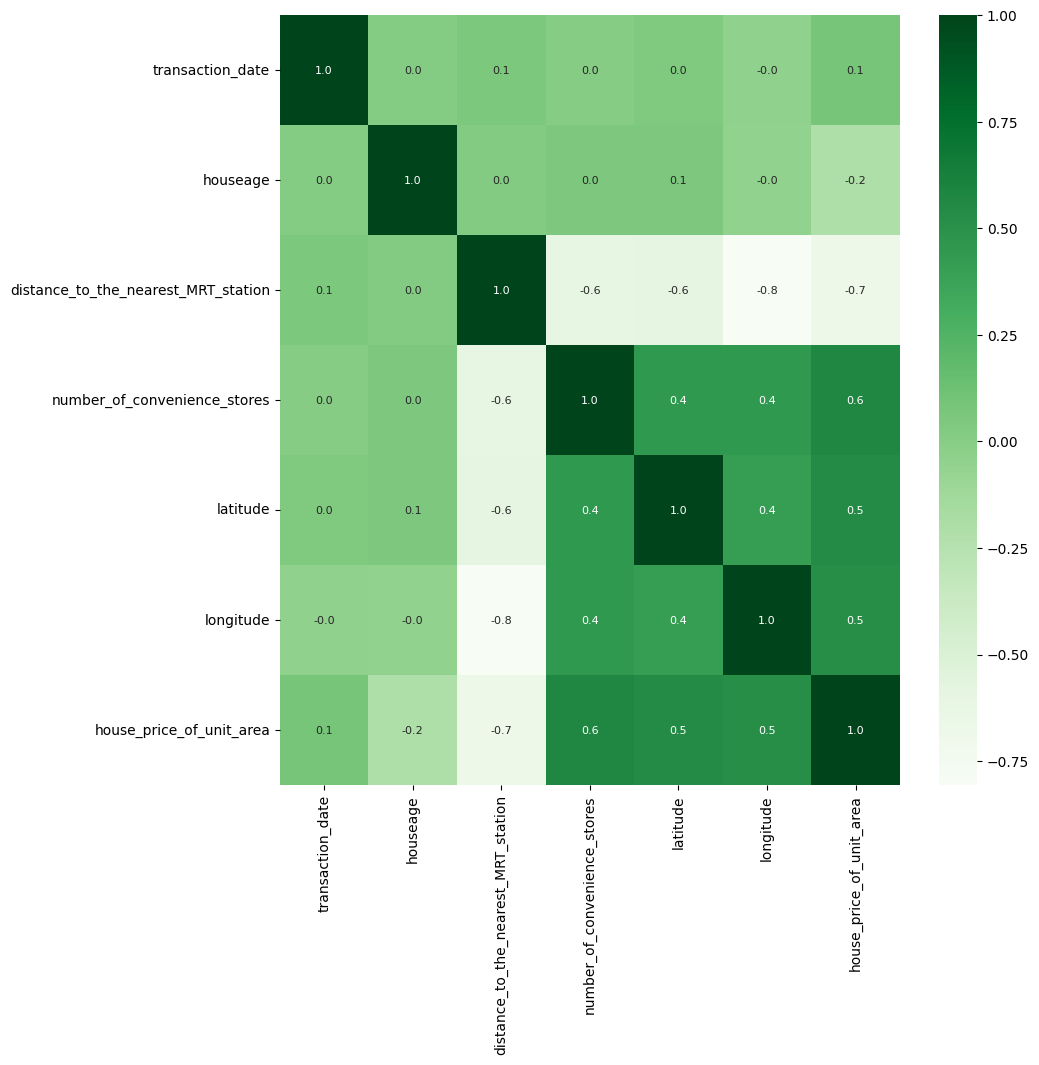

In [200]:
plt.figure(figsize =(10,10))
sns.heatmap(data.corr() , annot = True , cbar = True , fmt = '.1f' ,cmap = 'Greens',annot_kws ={'size':8})

In [201]:
x = data.drop(['house_price_of_unit_area'] , axis = 1)
y = data['house_price_of_unit_area']

In [202]:
x.head()

,transaction_date,houseage,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [203]:
from sklearn.preprocessing import Normalizer

**Normalize the data**

In [204]:
normalizer = Normalizer()

In [205]:
normalizer.transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


array([[0.99708516, 0.01585099, 0.04204416, 0.00495343, 0.01237515,
        0.06020416],
       [0.98671308, 0.00955872, 0.15028985, 0.00441172, 0.01224513,
        0.05957753],
       [0.96147519, 0.00635068, 0.26834461, 0.00238747, 0.01193138,
        0.05803657],
       ...,
       [0.97982221, 0.00914971, 0.19027975, 0.00340681, 0.01215706,
        0.05915185],
       [0.99674961, 0.00401077, 0.05189738, 0.00247578, 0.01236244,
        0.06018163],
       [0.9970896 , 0.00321881, 0.04479404, 0.00445682, 0.01236734,
        0.06018841]])

In [206]:
from sklearn.model_selection import train_test_split

In [209]:
from sklearn import metrics

In [210]:
x_train ,x_test ,y_train , y_test = train_test_split(x , y ,test_size = 0.2 ,random_state = 2)

In [211]:
print(x.shape , x_train.shape , x_test.shape)

(414, 6) (331, 6) (83, 6)


**Model Selection**

In [208]:
from sklearn.pipeline import make_pipeline


In [212]:
from sklearn.preprocessing import StandardScaler

In [213]:
from sklearn.multioutput import MultiOutputRegressor

In [214]:
from sklearn.ensemble import GradientBoostingRegressor

In [215]:
pipe = make_pipeline(StandardScaler(),GradientBoostingRegressor(random_state = 0))

In [216]:
pipe.fit(x_train , y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=0))])

In [217]:
train_prediction = pipe.predict(x_train)

In [219]:
score_1  = metrics.r2_score(y_train ,train_prediction)

# mean Absolute Error
score_2  = metrics.mean_absolute_error(y_train ,train_prediction)

print('R square Error :' , score_1)
print('mean square error :' , score_2)

R square Error : 0.933836724043947
mean square error : 2.6600478310541673


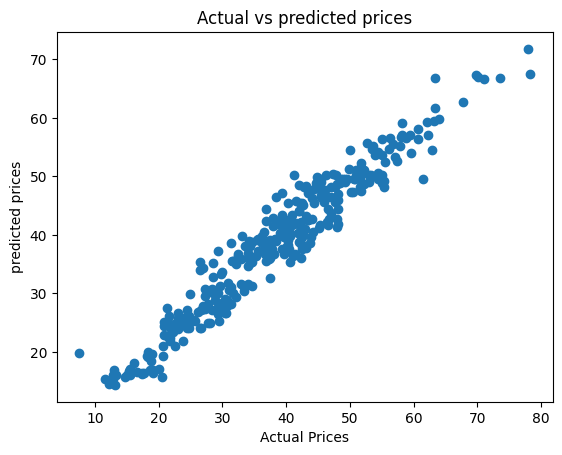

In [220]:
plt.scatter(y_train , train_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('predicted prices')
plt.title('Actual vs predicted prices')
plt.show()

In [221]:
test_prediction = pipe.predict(x_test)

In [222]:
#R squared Error
score_11 = metrics.r2_score(y_test , test_prediction)
# mean Absolute Error
score_22  = metrics.mean_absolute_error(y_test ,test_prediction)


print('R square Error :' , score_11)
print('mean square error :' , score_22)

R square Error : 0.5742547907834501
mean square error : 4.67122273634267


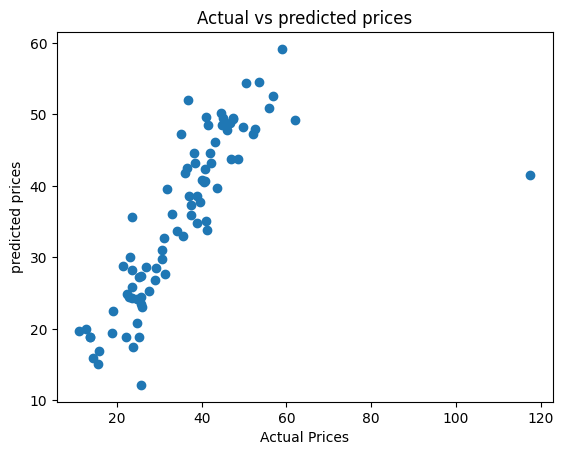

In [223]:
plt.scatter(y_test , test_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('predicted prices')
plt.title('Actual vs predicted prices')
plt.show()

In [224]:
pipe.predict([[2012.917,32.0	,84.87882	,10	,24.98298	,121.54024]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([41.44814319])